# Part I 

This is the companion notebook for the class on Decision Trees. It is supposed to be completed in class, with support from teachers and TAs. 

Take a look at this data. The data shows whether or not some users bought Tesla stocks, whether they have a Tesla, whether they like Elon Musk, and their age.

**NOTE**: This is fake data, just for fun :) 


| **Has a Tesla** |  **Likes Elon Musk**| **Age** | **Bought Tesla Stocks** |
|----------|----------|----------|----------|
| Yes      | No   | 19   | Yes   |
| No       | Yes  | 55   | Yes   |
| Yes      | Yes  | 33   | Yes   |
| Yes      | Yes  | 40   | Yes   |
| Yes      | Yes  | 55   | Yes   |
| Yes      | Yes  | 56   | Yes   |
| No       | No   | 10   | No    |
| No       | Yes  | 19   | No    |
| Yes      | Yes  | 26   | Yes   |
| Yes      | Yes  | 29   | Yes   |


Firs, we import the requires Libraries for you

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

import numpy as np
np.random.seed(42)


Second, we create a pandas dataframe with the information above. We include 'yes' and 'no' as a dummy variable, (Yes = 1, No = 0).

We also simplify the names of each column, as this will make it easier to handle the dataframe and sort the rows based on age. 

In [2]:
# Create the DataFrame
data = {
    'HT': [1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
    'LEM': [0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    'Age': [19, 55, 33, 40, 55, 56, 10, 19, 26, 29],
    'Bought_Tesla_Stocks': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

df = df.sort_values(by='Age')

df.head(10)

,HT,LEM,Age,Bought_Tesla_Stocks
6,0,0,10,0
0,1,0,19,1
7,0,1,19,0
8,1,1,26,1
9,1,1,29,1
2,1,1,33,1
3,1,1,40,1
1,0,1,55,1
4,1,1,55,1
5,1,1,56,1


Now, can you compute the Gini-Index for the columns 'Like Elon Musk' (LEM) and 'Has a Tesla' (HT) if we first split on 'Bought_Tesla_Stock'?

**Hint:** Split data into two leaves based on splitting criterion and compute gini-index in each leaf. Then compute gini-index of overall tree.

In [5]:
# Manually, you can compute the Gini Index as follow:

# To be completed by you
# Function to calculate Gini index for binary classification
def gini_index(column, target):
    unique_values = df[column].unique()
    gini = 0
    total = len(df)

    for value in unique_values:
        subset = df[df[column] == value]
        size = len(subset)
        proportion = size / total

        # Class probabilities in the subset
        p1 = len(subset[subset[target] == 1]) / size if size != 0 else 0
        p2 = 1 - p1

        # Gini impurity for the subset
        gini_impurity = 1 - (p1 ** 2 + p2 ** 2)
        gini += proportion * gini_impurity

    return gini

# Calculate Gini index for 'HT', 'LEM', and 'Age' (binned)
gini_HT = gini_index('HT', 'Bought_Tesla_Stocks')
gini_LEM = gini_index('LEM', 'Bought_Tesla_Stocks')


# Print results
print(f'Gini index for HT: {gini_HT}')
print(f'Gini index for LEM: {gini_LEM}')


Gini index for HT: 0.13333333333333333
Gini index for LEM: 0.275


Can you now compute the Gini-Index for age > 19 as well, still using 'Bought_Tesla_Stock' as the original splitting criterion?

In [9]:
# To be completed by you
# For Age, let's bin the ages into three groups: Young (<30), Middle-aged (30-50), Older (>50)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 19, 37, 100], labels=['Young', 'Middle-aged', 'Older'])

gini_Age = gini_index('Age_Group', 'Bought_Tesla_Stocks')

print(f'Gini index for Age (binned): {gini_Age}')

Gini index for Age (binned): 0.13333333333333333


Now, we have noticed that we have two features that have the same Gini index value. 
*  HT (Has a Tesla)
*  Age > 19 (or 22.5 as they have the same score)

Note, that there is no individual that has a Tesla (HT = 1) and did not buy Tesla Stocks (Bought_Tesla_Stocks=0). 
This means that that HT=1 is a **Leaf** and we do not need to grow the tree on that side! 
(you can go back to the slides for a visual representation).

So, we decide to use HT as the first feature to split our data. Then, we now need to find out what the second feature we should split on should be. To do so:

1. We create a subset of data for which HT is always 0
2. We compute the Gini Index on the new data set for the two features, 'Lem' and 'Age' and all possible splits using these variables.

Can you do that? You can use Age > 37 if you do not want to compute them all
 
 

In [12]:
# To be completed by you

Feature: Age > 14.5
Overall Gini Index: 0.3333
------------------------
Feature: Age > 37.0
Overall Gini Index: 0.0000
------------------------


If you made it until here, you have coded your first Decision Tree classifier! 

Ideally, the decision tree classifier keeps splitting the data. At each node (root node, or intendal node), you choose the feature (or the threshold value of a feature) that better separates your data. 

In our example:

1. At the root node, we separate the data base on whether the owner has a Tesla or not. This feature has the best Gini Index
    - As all users who have a Tesla also buy Tesla stock, we cannot furhter separate the data in this leaf. The output of this is a leaf where they all buy Tesla stock.
2. We then computed the Gini Index for the remaining features, and see that Age > 37 further divided the data into users that buy or not buy Tesla stocks
    - As all users have now been classified, we cannot furhter separate the data. The output of this is two leafs where the users all either bought or did not buy Tesla stocks.

![Sample Image](DecisionTree.png)

You have now built your first decision tree that can predict whether a certain user bought Tesla Stocks or not. Sklearn has the function **DecisionTreeClassifier** that builds it from the data directly for you. It works exactly as the procedure discussed above, using Gini Index as a default metric. Let's try! 

- The first thing to do is to import the sklearn package that contains the decision tree classifier model (there also exist a decision tree regresion model).
- Then we create our X variables (LEM, HT, Age) and our target variable y (has bought Tesla Stocks) and use it as our training data for our model
- We build the DecisionTreeClassifier using 'gini' as criterion
- We fit the model to the data

We can also print the structure of the tree to observe the structure of the resulting tree




In [13]:
# Create training data
x_train = df[['LEM','HT','Age']]
y_train = df['Bought_Tesla_Stocks']

#Build the model
clf = DecisionTreeClassifier(criterion='gini')  # Default criterion is Gini

# Fit the model
clf.fit(x_train, y_train)

# Print the tree
tree_rules = export_text(clf, feature_names=list(x_train.columns))
print(tree_rules)

|--- HT <= 0.50
|   |--- Age <= 37.00
|   |   |--- class: 0
|   |--- Age >  37.00
|   |   |--- class: 1
|--- HT >  0.50
|   |--- class: 1



# Part II 

Now that we have seen how the Decision Tree Classifier model works and how Ensemble methods can enhance them, let's try to compare these two approaches. To begin with, let's start with the data from last week.

1) Let's import the data
2) Let's split the data into a training and test data set

We can do this for you. 

In [16]:
# Load the data
f=pd.read_csv("NYC_taxis_weather_2016_with_dummies.csv")

# Create stress variable (target variable)
stress_threshold=np.percentile(f['pickups1'], 90)
f['stress']=f['pickups1'].apply(lambda x: x>stress_threshold)

# Split data into training and test
split=int(len(f)*2.0/3)
training=f[:split]
test=f[split:]

# Separate target variables from the other features 

Features=['pickups17_lag1', 'pickups17_lag2', 'pickups1_lag1',
       'pickups1_lag2', 'pickups21_lag1', 'pickups21_lag2', 'pickups28_lag1',
       'pickups28_lag2',  'temp', 'prcp','fog', 'rain_drizzle', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_afternoon rush', 'time_of_day_evening',
       'time_of_day_lunch time', 'time_of_day_morning',
       'time_of_day_morning rush','time_of_day_night']

x_train=training[Features]
x_test=test[Features]

y_train=training['stress']

y_test=test['stress']

# Standardize data
x_test=(x_test-x_train.mean())/x_train.std() # Remember to use x_train to standardise.
x_train=(x_train-x_train.mean())/x_train.std()


Now it is your turn! 

Can you build a decision tree classifier on this data?

In [22]:
# To be completed by you
# Create the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.93
Confusion Matrix:
[[4977  259]
 [ 174  414]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.95      0.96      5236
        True       0.62      0.70      0.66       588

    accuracy                           0.93      5824
   macro avg       0.79      0.83      0.81      5824
weighted avg       0.93      0.93      0.93      5824



Can you plot the confusion matrix for **both** the training set *and* the test set?

Can you also print the accuracy score and recall score for **both** test sets?

**TIP**: you can import all these metrics from sklearn.metrics (we did this for you, but feel free to use any other method). You can do so by using the format: function(true_labels, predicted_labels).

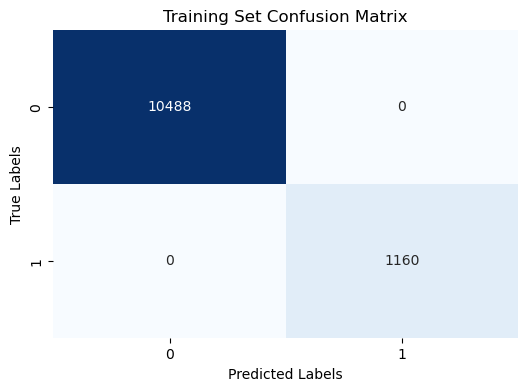

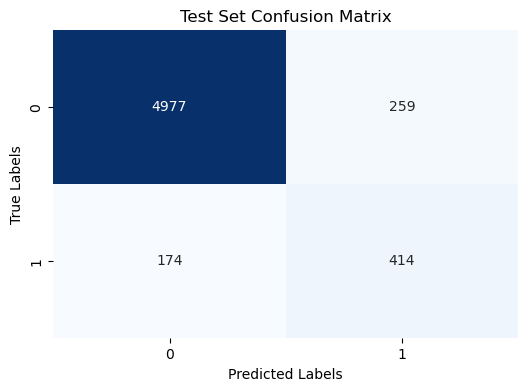

Training Accuracy: 1.00
Training Recall: 1.00
Test Accuracy: 0.93
Test Recall: 0.70


In [23]:
# To be completed by you
# Fit the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Predict on training set
y_train_pred = clf.predict(x_train)

# Predict on test set
y_test_pred = clf.predict(x_test)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Confusion matrix for training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Plot confusion matrix for training set
plot_confusion_matrix(train_conf_matrix, "Training Set Confusion Matrix")

# Plot confusion matrix for test set
plot_confusion_matrix(test_conf_matrix, "Test Set Confusion Matrix")

# Print the accuracy and recall for both sets
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Recall: {test_recall:.2f}")

Can you wrap this into a function that plots the confusion matrix and the accuracy and recall 

(e.g., `plotCF(y_train, y_pred)`?

This is 'optional', but it will help you keep your code clean (and avoid mistakes due to e.g., copy paste multiple times the same lines)

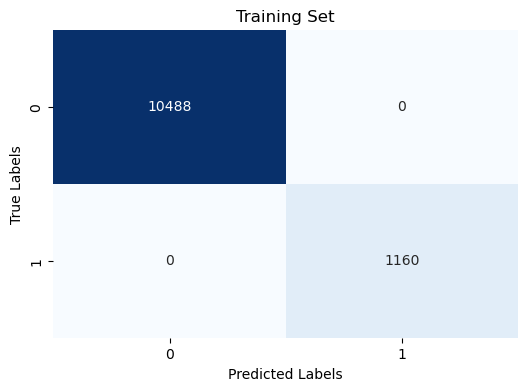

Training Set Accuracy: 1.00
Training Set Recall: 1.00


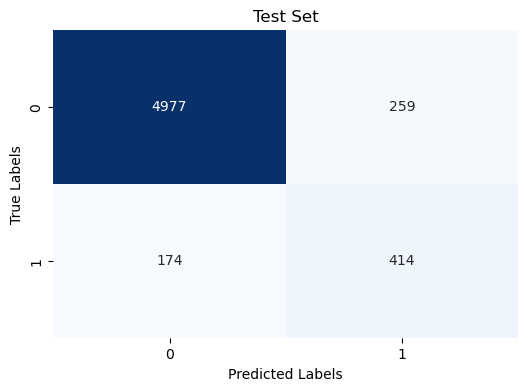

Test Set Accuracy: 0.93
Test Set Recall: 0.70


In [30]:
# To be completed by you
# Define the function to plot confusion matrix and print metrics
def plotCF(y_true, y_pred, title="Confusion Matrix"):
    # Calculate accuracy and recall
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print accuracy and recall
    print(f"{title} Accuracy: {accuracy:.2f}")
    print(f"{title} Recall: {recall:.2f}")

# Fit the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Predict on training set
y_train_pred = clf.predict(x_train)

# Predict on test set
y_test_pred = clf.predict(x_test)

# Use the plotCF function for training set
plotCF(y_train, y_train_pred, title="Training Set")

# Use the plotCF function for test set
plotCF(y_test, y_test_pred, title="Test Set")

As expected, Decision Trees fit the training data a bit too well. Can you try to reduce the overfitting? 

Before moving to fancier models (gradient boosting, random forest), we can change some of the inputs of the decision tree. At least, we should try to change these two parameters (as they reduce overfitting):
- max_depth,
- min_samples_leaf

Change the parameters inside the function - e.g. `DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2)`

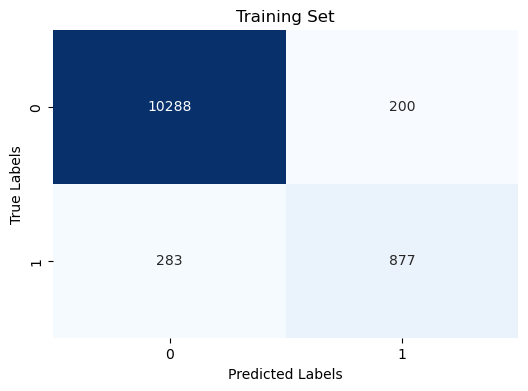

Training Set Accuracy: 0.96
Training Set Recall: 0.76


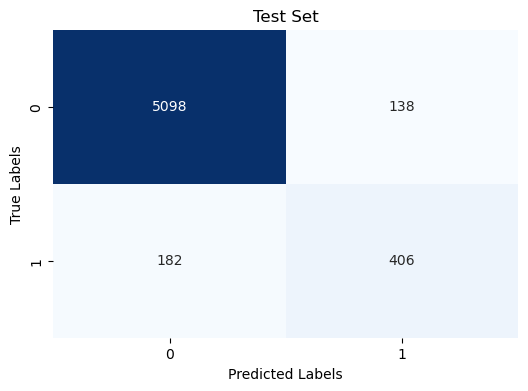

Test Set Accuracy: 0.95
Test Set Recall: 0.69


In [31]:
# To be completed by you
# Define a function to train the Decision Tree and plot the confusion matrix, accuracy, and recall
def train_and_plot_tree(x_train, y_train, x_test, y_test, max_depth=None, min_samples_leaf=1):
    # Create the Decision Tree Classifier with tuned parameters
    clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

    # Fit the model
    clf.fit(x_train, y_train)

    # Predict on training set
    y_train_pred = clf.predict(x_train)

    # Predict on test set
    y_test_pred = clf.predict(x_test)

    # Use the plotCF function for training set
    plotCF(y_train, y_train_pred, title="Training Set")

    # Use the plotCF function for test set
    plotCF(y_test, y_test_pred, title="Test Set")

# Set max_depth and min_samples_leaf to control overfitting
max_depth = 5         # Limiting the depth of the tree
min_samples_leaf = 10 # Ensure each leaf has at least 10 samples

# Call the function with these parameters
train_and_plot_tree(x_train, y_train, x_test, y_test, max_depth=max_depth, min_samples_leaf=min_samples_leaf)


## Ensembling models

It is time now to try Random Forest and Gradient boosting and see if they can do better

You can import both from `sklearn.ensamble`

- Import and run `RandomForestClassifier` and `GradientBoostingClassifier` from SKlearn
- For each of classifier, plot the confusion matrix for training and test data
- For eaach classifier, compute the accuracy and recall score, both on the training data and on the test data

Basically, we want to compare the results of the Decision Tree with these two methods. Can you do that?

### Random Forest Classifier ###


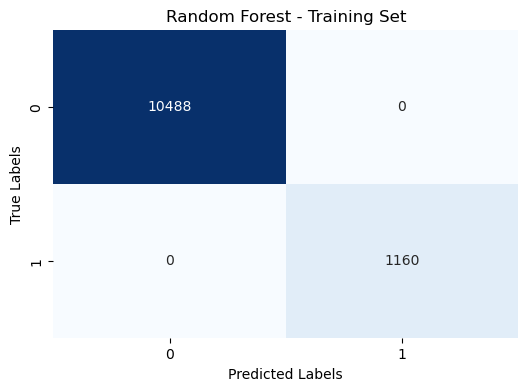

Random Forest - Training Set Accuracy: 1.00
Random Forest - Training Set Recall: 1.00


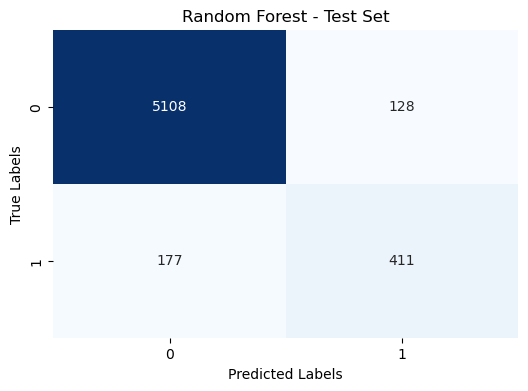

Random Forest - Test Set Accuracy: 0.95
Random Forest - Test Set Recall: 0.70


In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# To be completed by you (Random Forest Classfier)
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define a function to train and evaluate the model using the existing plotCF function
def train_and_plot_ensemble(clf, x_train, y_train, x_test, y_test, title):
    # Fit the classifier
    clf.fit(x_train, y_train)

    # Predict on training set
    y_train_pred = clf.predict(x_train)

    # Predict on test set
    y_test_pred = clf.predict(x_test)

    # Use plotCF function for training set
    plotCF(y_train, y_train_pred, title=f"{title} - Training Set")

    # Use plotCF function for test set
    plotCF(y_test, y_test_pred, title=f"{title} - Test Set")

# Train and evaluate RandomForestClassifier
print("### Random Forest Classifier ###")
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
train_and_plot_ensemble(rf_clf, x_train, y_train, x_test, y_test, title="Random Forest")



### Gradient Boosting Classifier ###


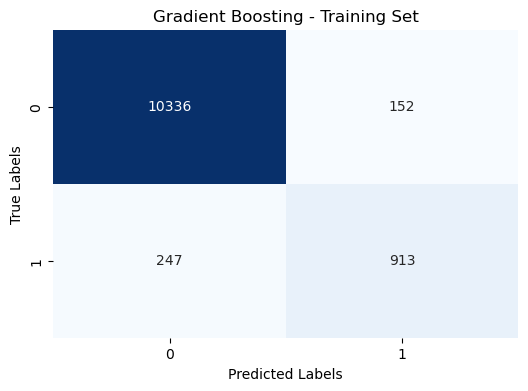

Gradient Boosting - Training Set Accuracy: 0.97
Gradient Boosting - Training Set Recall: 0.79


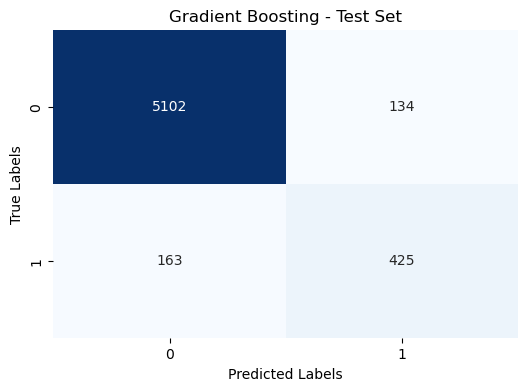

Gradient Boosting - Test Set Accuracy: 0.95
Gradient Boosting - Test Set Recall: 0.72


In [33]:
# To be completed by you (Gradient Boosting Classifier)
# Train and evaluate GradientBoostingClassifier
print("\n### Gradient Boosting Classifier ###")
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100)
train_and_plot_ensemble(gb_clf, x_train, y_train, x_test, y_test, title="Gradient Boosting")

What can you conclude from the comparison of the three models? 
- Can you understand why the performance of the Decision Tree change when you change the parameters?
- Did you observe any difference between the Random Forest and the Gradient Boosting? Can you explain it?

If you have time, you can try to change the parameters of the Gradient Boosting and the Random Forest to see if you obtain better results. 

# Part III 

Now we want to decide which of the three models performs better. The performance metrix give us some idea, but it is difficult to decide between the three. 

The objectives of this part are: 

1) First, we want to change the threshold of the classifier, so that we can compute Precision, Recall, and FPR for different thresholds
2) Second, we want to plot the ROC curve
3) Finally, we want to decide which classifier to use using the ROC and the Precision Recall Curve

This is how we can start:
- To begin with, the standard `clf.predict()` returns labels based on a default probability of 0.5
- We can use `clf.predict_proba()` to get the probabilities instead of the label, for each observation
- We can use this feature to write a function that takes as input a threshold value and an existing classifier, and returns the new labels based on the thresholds

For example:

In [34]:
#Create a very simple model
DTclf_tmp = DecisionTreeClassifier(criterion='gini',max_depth=2, max_leaf_nodes=100000)     

# Fit it to the data
DTclf_tmp.fit(x_train, y_train)

# Look at the results
print('These are the predictions based on a threshold of 0.5')
print(DTclf_tmp.predict(x_test))
print('\n')
print('*'*48)
print('These are predicted probabilities')
print(DTclf_tmp.predict_proba(x_test)[:, 1])

These are the predictions based on a threshold of 0.5
[False False False ... False False False]


************************************************
These are predicted probabilities
[0.0051015  0.0051015  0.0051015  ... 0.22285714 0.0051015  0.0051015 ]


As you can see, all the points are predicted as *False* using the default threshold of 0.5.

However, some observations have a higher probability to belong to the positive class. 
If we were to reduce the threshold to 0.15, for example, some points whould be classified as *True*.

We created this function for you that provides the predictions for the classifier given a specific threshold (but feel free to make something different)

In [35]:
def pred_fixed_threshold(clf,x,threshold):
    
    """
    it returns the predictions for a binary classifier clf, given some data x and a threshold.

    :param clf      : sklearn classifier (tested with: Decision Tree, Random Forest, Gradient Boosting)
    :param x        : data to be used to make the predictions
    :param threshold: Numerical threshold value between 0.1
    :return: Precition labels 0 and 1 for each observation
    """ 
    y_proba = clf.predict_proba(x)
    return (y_proba[:, 1] > threshold).astype(int)


print('These are the predictions based on a threshold of 0.15')
print(pred_fixed_threshold(DTclf_tmp,x_test,0.15))

These are the predictions based on a threshold of 0.15
[0 0 0 ... 1 0 0]


Now that we know how compute the new probabilities given a threshols, let's see how the Random Forest Classifier performs with different thresholds.

First, let's see what happens when we change the thresholds to some value (could be 0.01, or something else). 

Try to plot the confusion matrix, the accuracy, and the recall, for the Random Forest classifier for two thresholds: 0.5, and 0.1.

In [36]:
threshold=0.1

# To be completed by you

Interesting! It looks like changing the threshold can have an impact! 
Now we really want to assess these models! 

To do so, let's compute the TPR (Recall) and FPR, for different thresholds. The TPR is the recall (so we already have it). 

For the FPR, you will need to compute it from the confusion matrix. Can you write a function that does that? 

In [37]:
#Function to compute the FPR
def compute_fpr(y_true, y_pred):
    """
    Compute the False Positive Rate (FPR) from true and predicted labels.  
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels
    float: The False Positive Rate
    """
    # To be completed by you
    
    return FP / (FP + TN)

With the function created, we simply need to comput FPR and recall for different thresholds:

1) conpute both FPR and TPR for the following threshold values `threshold=[-1, 0.2, 0.4, 0.6, 0.8, 1]`
2) plot the ROC curve for the obtanined values
 
 

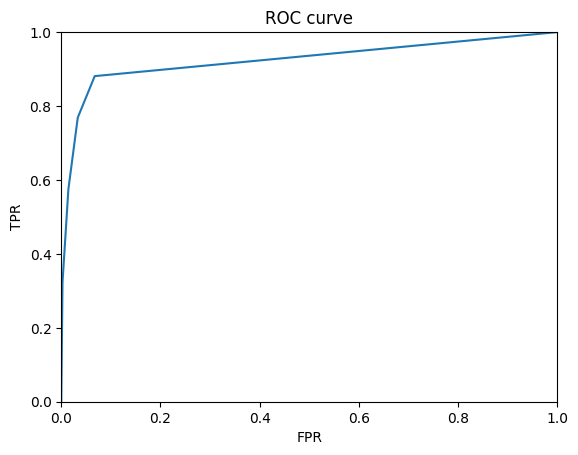

In [52]:
# To be completed by you

- That's it! You can now compute the area under the ROC curve
- Of course, we should compute more points to have a better estimate
- Fortunately, there are smarter ways to compute these curves (as always)
- SKlearn allows you to compute the ROC and Precision Recall Curve using the simple functions 
   - `RocCurveDisplay`
   - `PrecisionRecallDisplay`
   
Let's see how this work for the Support Vector Machine (at the end, maybe it is better than Decision Tree..?)

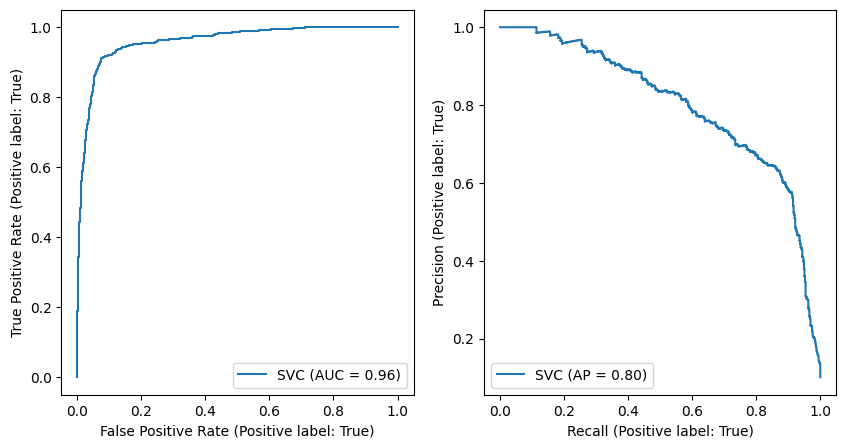

In [53]:
from sklearn.metrics import RocCurveDisplay, roc_curve, PrecisionRecallDisplay
from sklearn.svm import SVC

SVclf = SVC()
# Fit the model
SVclf.fit(x_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  
RocCurveDisplay.from_estimator(SVclf, x_test, y_test,ax=ax[0])
PrecisionRecallDisplay.from_estimator(SVclf, x_test, y_test,ax=ax[1])
plt.show()



Cool! 

Now you have all the ingredients! 

- Compute both the ROC and the Precision-Recall Curves for the four classifiers (Decision Tree, Random Forest, Gradient Boosting, Support Vector Machine)
- Make a critical decision on which one is better
- Try to discuss why these models perform differently 

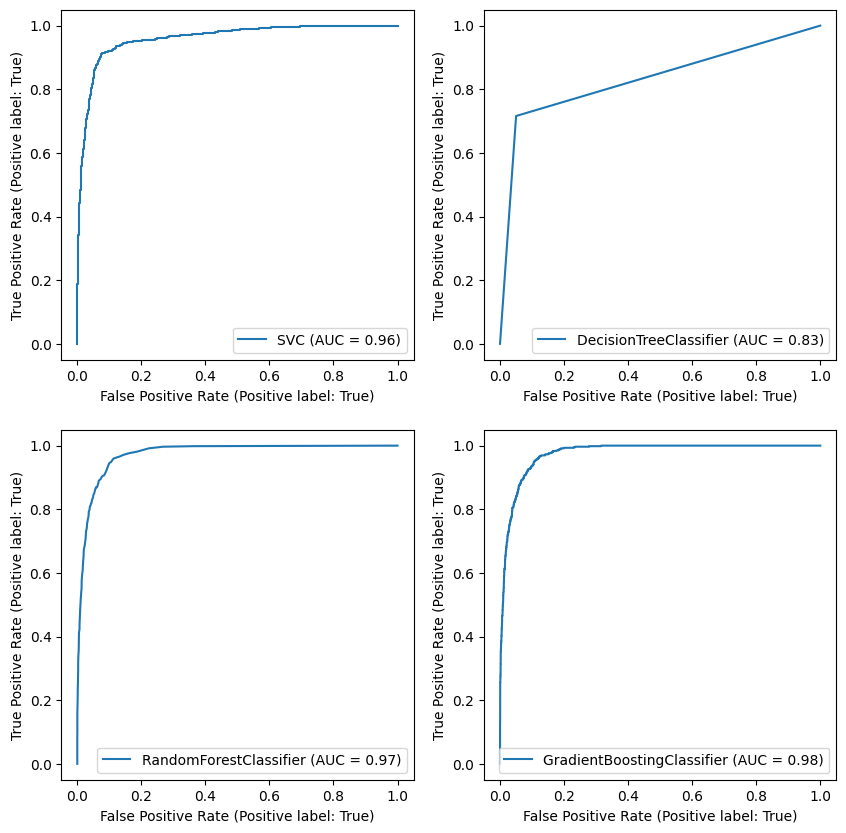

In [37]:
# To be completed by you



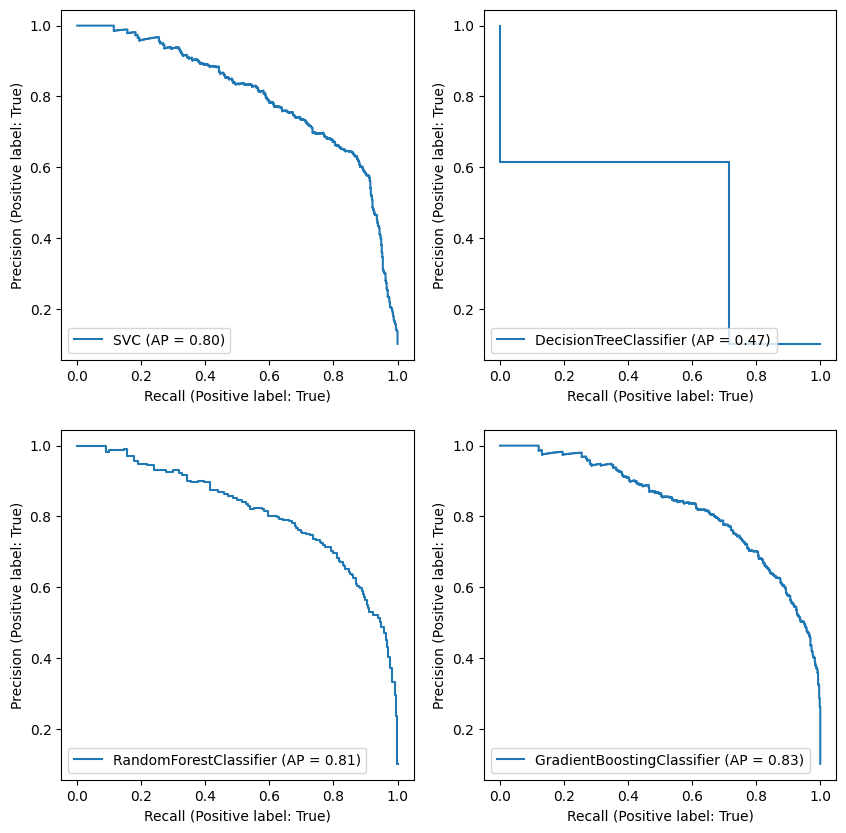

In [38]:
# To be completed by you
